# Importación de librerías

In [13]:
# Tratamiento de datos.
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import locale as lc

# Visualizaciones.
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos de bank-additional.csv

In [14]:
df_bank = pd.read_csv('../data/raw/bank-additional.csv', parse_dates=['date'], date_format='%d-%B-%Y')

Se  procede a cargar el archivo ``bank-additional.csv`` en un DataFrame mediante ``read_csv``.

El parámetro ``parse_dates=['date']`` convierte automáticamente la columna ``date`` al formato de fecha ``datetime``.

Por ultimo ``date_format='%d-%B-%Y'`` indica el formato exacto en el que se encuentran las fechas para garantizar una conversión correcta.

# Columna de datos

●   ``age``: La edad del cliente.

●   ``job``: La ocupación o profesión del cliente.

●   ``marital``: El estado civil del cliente.

●   ``education``: El nivel educativo del cliente.

●   ``default``: Indica si el cliente tiene algún historial de incumplimiento de pagos (1: Sí, 0: No).

●   ``housing``: Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).

●   ``loan``: Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No).

●   ``contact``: El método de contacto utilizado para comunicarse con el cliente.

●   ``duration``: La duración en segundos de la última interacción con el cliente.

●   ``campaign``: El número de contactos realizados durante esta campaña para este cliente.

●   ``pdays``: Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña.

●   ``previous``: Número de veces que se ha contactado con el cliente antes de esta campaña.

●   ``poutcome``: Resultado de la campaña de marketing anterior.

●   ``emp.var.rate``: La tasa de variación del empleo.

●   ``cons.price.idx``: El índice de precios al consumidor.

●   ``cons.conf.idx``: El índice de confianza del consumidor.

●   ``euribor3m``: La tasa de interés de referencia a tres meses.

●   ``nr.employed``: El número del empleado.

●   ``y``: Indica si el cliente ha suscrito un producto o servicio (Sí/No).

●   ``date``: La fecha en la que se realizó la interacción con el cliente.

●   ``contact_month``: Mes en el que se realizó la interacción con el cliente durante la campaña de marketing.

●   ``contact_year``: Año en el que se realizó la interacción con el cliente durante la campaña de marketing.

●   ``id_``: Un identificador único para cada registro en el dataset.

# Análisis preliminar

### Vemos las primeras filas

In [3]:
df_bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### Vemos las ultimas filas

In [4]:
df_bank.tail()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
42995,19154,NaN,admin.,MARRIED,university.degree,0.0,0.0,0.0,cellular,618,2,999,0,NONEXISTENT,1.4,"93,444","-36,1",NaN,"5228,1",yes,13-octubre-2015,38.147,-105.582,4eed05de-2a98-4227-b488-32122009b638
42996,26206,34.0,technician,MARRIED,professional.course,0.0,1.0,1.0,cellular,42,7,999,0,NONEXISTENT,-0.1,"93,2",-42,NaN,"5195,8",no,17-marzo-2018,49.235,-112.201,0f0aca88-4088-4fe2-905f-44fb675d9493
42997,15046,NaN,blue-collar,SINGLE,basic.6y,0.0,1.0,0.0,cellular,391,2,999,0,NONEXISTENT,1.4,"93,918","-42,7",NaN,"5228,1",no,15-septiembre-2016,40.679,-120.015,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b
42998,15280,NaN,admin.,MARRIED,university.degree,NaN,0.0,0.0,cellular,674,3,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,958","5228,1",no,23-septiembre-2019,27.772,-117.518,5f432048-d515-4bb5-9c94-62db451f88d4
42999,27570,NaN,unemployed,SINGLE,university.degree,0.0,0.0,1.0,cellular,104,2,999,0,NONEXISTENT,-0.1,"93,2",-42,"4,021","5195,8",no,6-noviembre-2019,41.146,-105.026,993bbbd6-4dbc-4a40-a408-f91f8462bee6


## Observamos el número de filas y columnas

In [15]:
print(f"------------------------------\n El número de filas es: {df_bank.shape[0]}\n------------------------------")
print(f" El número de columnas es: {df_bank.shape[1]}\n------------------------------")

------------------------------
 El número de filas es: 43000
------------------------------
 El número de columnas es: 24
------------------------------


## Examinamos los tipos de columnas categóricas y numéricas que tenemos

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

Observamos que algunas columnas presentan un tipo de dato distinto al que les corresponde:

- La columna ``age`` figura como tipo ``float``, cuando la edad no puede contener decimales y por eso debería ser tipo ``int``.

- La columna ``date`` aparece como ``object`` cuando deberia almacenarse como ``datetime``.

- Las columnas ``cons.price.idx`` , ``cons.conf.idx``, ``euribor3m`` estan registradas como ``object`` cuando deberían ser tipo ``float``.

- La columna ``nr.employed`` se encuentra como un dato tipo ``object``, cuando el número de empleado debe representarse como ``int``. 


## Generamos el resumen estadístico del conjunto de datos

In [7]:
df_bank.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43000.0,20651.10,11868.77,0.0,10381.75,20642.50,30930.25,41187.00
age,37880.0,39.98,10.44,17.0,32.00,38.00,47.00,98.00
default,34019.0,0.00,0.01,0.0,0.00,0.00,0.00,1.00
housing,41974.0,0.54,0.50,0.0,0.00,1.00,1.00,1.00
loan,41974.0,0.16,0.36,0.0,0.00,0.00,0.00,1.00
duration,43000.0,257.74,258.67,0.0,102.00,179.00,319.00,4918.00
campaign,43000.0,2.57,2.77,1.0,1.00,2.00,3.00,56.00
pdays,43000.0,962.33,187.26,0.0,999.00,999.00,999.00,999.00
previous,43000.0,0.17,0.50,0.0,0.00,0.00,0.00,7.00
emp.var.rate,43000.0,0.08,1.57,-3.4,-1.80,1.10,1.40,1.40


En esta tabla se muestra la cantidad de valores presentes en cada columna, las columnas ``age``, ``default``, ``housing``, ``loan`` y ``date`` muestran la presencia de valores ausentes.

También se pueden consultar la media de cada variable, junto con sus valores mínimo y máximo, además de su desviación estándar.

Por ultimo se muestran el primer cuartil (25 %), el segundo cuartil o mediana (50 %) y el tercer cuartil (75 %), que describen la distribución central de los datos.

## Análisis de fechas

Se convierte la columna ``date`` de tipo ``object`` a ``datetime`` con el fin de identificar correctamente los valores únicos de los años y analizar el intervalo temporal presente en la base de datos.

In [16]:
lc.setlocale(lc.LC_TIME, 'es_ES')

print(f"Los valores únicos de los años para la columna {'date'} son: {df_bank['date'].dt.year.unique()}")

Los valores únicos de los años para la columna date son: [2019. 2016. 2015. 2017. 2018.   nan]


Se observa que los datos comprenden el periodo 2016–2019, ambos inclusive, y que algunas filas contienen valores nulos.

## Duplicados

Se verifica la presencia de duplicados en la base de datos.


In [11]:
df_bank.duplicated().sum()

np.int64(0)

El resultado confirma que no hay filas duplicadas, por lo que no se requiere realizar ninguna eliminación.

## Valores nulos

Se evalúa el número total de valores nulos presentes en el conjunto de datos.

In [10]:
nulos = df_bank.isna().sum().sort_values(ascending=False)

nulos[nulos > 0]

euribor3m         9256
default           8981
age               5120
education         1807
loan              1026
housing           1026
cons.price.idx     471
job                345
date               248
marital             85
dtype: int64

El análisis confirma la existencia de valores faltantes en varias columnas.

A continuación, se calcula el porcentaje de valores nulos por columna con el fin de determinar su relevancia y valorar el impacto que pueden tener en el análisis.

In [19]:
nulos_porcen = df_bank.isna().mean()*100

nulos_porcen[nulos_porcen > 0].round(2)

age               11.91
job                0.80
marital            0.20
education          4.20
default           20.89
housing            2.39
loan               2.39
cons.price.idx     1.10
euribor3m         21.53
date               0.58
dtype: float64

El análisis revela que varias columnas presentan porcentajes de valores nulos que requieren especial atención:

- ``age``: aproximadamente un 12 %, lo que representa un volumen moderado de datos ausentes.

- ``default``: más del 20 %, indicando un nivel elevado de valores nulos.

- ``euribor3m``: en torno al 21 %, también con una proporción elevada de valores nulos.

- ``education``: algo superior al 4 %, porcentaje relativamente bajo.

En el resto de columnas, la presencia de valores nulos es mínima, en algunos casos prácticamente insignificantes.

Con esta información, es fundamental prestar especial atención a las variables con mayores porcentajes de valores nulos en las fases posteriores del análisis, ya que pueden influir de forma notable en la calidad y la fiabilidad de los resultados.

# Análisis de la estructura y composición de las variables

A continuación se analiza la distribución y el comportamiento de las variables del conjunto de datos, atendiendo a sus características y particularidades.

## Variables numéricas

In [20]:
columns_num = df_bank.select_dtypes(include='number').columns

columns_num

Index(['Unnamed: 0', 'age', 'default', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'latitude',
       'longitude'],
      dtype='object')

El conjunto de datos incorpora múltiples variables numéricas que representan información demográfica, indicadores de actividad previa y métricas operativas relevantes para el análisis, incluyendo duración de interacciones, tasas económicas y recuentos asociados a campañas y contactos anteriores.

In [21]:
df_bank.describe(include='number').round(2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43000.0,20651.10,11868.77,0.0,10381.75,20642.50,30930.25,41187.00
age,37880.0,39.98,10.44,17.0,32.00,38.00,47.00,98.00
default,34019.0,0.00,0.01,0.0,0.00,0.00,0.00,1.00
housing,41974.0,0.54,0.50,0.0,0.00,1.00,1.00,1.00
loan,41974.0,0.16,0.36,0.0,0.00,0.00,0.00,1.00
duration,43000.0,257.74,258.67,0.0,102.00,179.00,319.00,4918.00
campaign,43000.0,2.57,2.77,1.0,1.00,2.00,3.00,56.00
pdays,43000.0,962.33,187.26,0.0,999.00,999.00,999.00,999.00
previous,43000.0,0.17,0.50,0.0,0.00,0.00,0.00,7.00
emp.var.rate,43000.0,0.08,1.57,-3.4,-1.80,1.10,1.40,1.40


En este caso, el metodo ``describe`` se aplica únicamente a las variables numéricas, proporcionando un resumen estadístico detallado y específico para este tipo de datos, complementando así el análisis descriptivo general realizado previamente.

In [22]:
df_bank.median(numeric_only=True).round(2)

Unnamed: 0      20642.50
age                38.00
default             0.00
housing             1.00
loan                0.00
duration          179.00
campaign            2.00
pdays             999.00
previous            0.00
emp.var.rate        1.10
latitude           36.76
longitude         -95.90
dtype: float64

``median`` es un método de pandas que calcula la mediana exclusivamente sobre las columnas de las variables numéricas del conjunto de datos. Al restringir el cálculo a este tipo de variables, proporciona una estimación precisa de la tendencia central sin interferencia de columnas no cuantitativas.

**Observaciones** :

- **``age``** : La media de edad se encuentra en 40 años, ademas vemos que el valor de la desviación estandar es de 10 lo que nos indica que los valores de edad se encuentran entre 30 y 50 años, más adelante observamos que el Q1(25%) nos muestra un valor de 32 y el Q3(75%) de 47 lo que nos confirma que la mayoria de los valores se encuentran comprendidos en esta franja de edad.
Tambien se observa que el valor minimo de nuestros datos es 17 lo que no tiene mucho sentido ya que se supone que los menores de edad no pueden tener cuenta en un banco, mientras que el valor maximo es de 98 algo poco comun pero que podria ser cierto, todo esto se estudiara más adelante.

.......................................



## Variables categoricas

In [24]:
columns_cate = df_bank.select_dtypes(include= ['category', 'object']).columns

columns_cate

Index(['job', 'marital', 'education', 'contact', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'id_'],
      dtype='object')

Estas variables recogen información cualitativa relacionada con la situación laboral, el estado civil, el nivel educativo, la formación, el historial crediticio y el tipo de interacción con el cliente, así como los resultados de campañas anteriores, la respuesta final y los identificadores asociados a cada registro.

In [31]:
df_bank.describe( include=['category', 'object']).T

,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,MARRIED,25999
education,41193,7,university.degree,12722
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
cons.price.idx,42529,26,"93,994",7938
cons.conf.idx,43000,26,"-36,4",8020
euribor3m,33744,309,"4,857",2287
nr.employed,43000,11,"5228,1",16980
y,43000,2,no,38156


En este caso, el método ``describe`` se aplica únicamente a las variables categóricas, ofreciendo un resumen descriptivo específico que incluye el número de valores no nulos, la cantidad de categorías distintas y la categoría más frecuente junto con su frecuencia, lo que complementa de manera el análisis descriptivo general realizado previamente.

A continuación se procede a analizar cada variable categórica determinando el número de valores únicos presentes en cada columna y mostrando su distribución de frecuencias, con el objetivo de describir su composición y variabilidad.

In [30]:
for col in columns_cate:
    print(f'La columna {col} tiene un total de {df_bank[col].nunique()} valores unicos')

    display(df_bank[col].value_counts().head(12))

La columna job tiene un total de 11 valores unicos


job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

La columna marital tiene un total de 3 valores unicos


marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64

La columna education tiene un total de 7 valores unicos


education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64

La columna contact tiene un total de 2 valores unicos


contact
cellular     27396
telephone    15604
Name: count, dtype: int64

La columna poutcome tiene un total de 3 valores unicos


poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

La columna cons.price.idx tiene un total de 26 valores unicos


cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     803
92,963     742
92,431     471
92,649     375
94,215     320
Name: count, dtype: int64

La columna cons.conf.idx tiene un total de 26 valores unicos


cons.conf.idx
-36,4    8020
-42,7    7004
-46,2    6057
-36,1    5408
-41,8    4568
-42      3782
-47,1    2581
-31,4     815
-40,8     748
-26,9     477
-30,1     379
-40,3     328
Name: count, dtype: int64

La columna euribor3m tiene un total de 309 valores unicos


euribor3m
4,857    2287
4,962    2124
4,963    2019
4,961    1594
4,964     964
4,856     961
1,405     954
4,864     871
4,965     866
4,96      836
4,968     788
4,959     763
Name: count, dtype: int64

La columna nr.employed tiene un total de 11 valores unicos


nr.employed
5228,1    16980
5099,1     8937
5191       8020
5195,8     3830
5076,2     1748
5017,5     1133
4991,6      812
5008,7      683
4963,6      665
5023,5      181
5176,3       11
Name: count, dtype: int64

La columna y tiene un total de 2 valores unicos


y
no     38156
yes     4844
Name: count, dtype: int64

La columna id_ tiene un total de 43000 valores unicos


id_
993bbbd6-4dbc-4a40-a408-f91f8462bee6    1
089b39d8-e4d0-461b-87d4-814d71e0e079    1
e9d37224-cb6f-4942-98d7-46672963d097    1
3f9f49b5-e410-4948-bf6e-f9244f04918b    1
9991fafb-4447-451a-8be2-b0df6098d13e    1
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    1
d63ede72-0b6d-45b1-8872-385ac6897f65    1
5e3483e5-236d-437d-8351-541f9d09b9dd    1
9ebb7576-92de-4949-b2e3-e56890740112    1
85e7d06a-50c4-4b82-bcb7-45525c7f7f6a    1
071e39a6-519d-4286-8001-88cc9b237e01    1
4c72e852-475d-4fb7-81d6-a7dd467cb4f0    1
Name: count, dtype: int64

## Observaciones:

................................

# Carga de datos customer-details.xlsx

In [33]:
df_customer = pd.read_excel('../data/raw/customer-details.xlsx', sheet_name= None)

df_union = pd.concat(df_customer.values(), ignore_index=True)

Se cargan todas las hojas del fichero ``customer-details.xlsx`` en un diccionario de DataFrames mediante ``sheet_name=None``.

A continuación, se concatenan todos esos DataFrames con ``pd.concat``.

El resultado es ``df_union``, un único DataFrame que integra la información de todas las hojas, con el índice reenumerado.

# Columna de datos

●	``Income``: Representa el ingreso anual del cliente en términos monetarios.

●	``Kidhome``: Indica el número de niños en el hogar del cliente.

●	``Teenhome``: Indica el número de adolescentes en el hogar del cliente.

●	``Dt_Customer``: Representa la fecha en que el cliente se convirtió en cliente de la empresa.

●	``NumWebVisitsMonth``: Indica la cantidad de visitas mensuales del cliente al sitio web de la empresa.

●	``ID``: Identificador único del cliente.

# Análisis preliminar

### Vemos las primeras filas

In [34]:
df_union.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### Vemos las ultimas filas

In [35]:
df_union.tail()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
43165,14085,156980,1,2,2014-05-17,7,5f432048-d515-4bb5-9c94-62db451f88d4
43166,14086,139820,0,0,2014-09-29,1,993bbbd6-4dbc-4a40-a408-f91f8462bee6
43167,14087,78470,2,2,2014-10-28,12,d6271666-319d-42c8-a741-cb22bf2c2093
43168,14088,144218,0,1,2014-07-01,9,f67fbfa8-6573-414d-a805-b26a2f1b1ceb
43169,14089,115155,0,2,2014-12-25,7,9727bc06-c11a-461a-a5bb-3d210467cc2a


## Observamos el número de filas y columnas

In [36]:
print(f"------------------------------\n El número de filas es: {df_union.shape[0]}\n------------------------------")
print(f" El número de columnas es: {df_union.shape[1]}\n------------------------------")

------------------------------
 El número de filas es: 43170
------------------------------
 El número de columnas es: 7
------------------------------


## Examinamos los tipos de columnas categóricas y numéricas que tenemos

In [30]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


En este caso se observa que no es preciso efectuar ninguna modificacion, puesto que las columnas ya presentan los tipos de datos correctos y coherentes con su contenido.

## Generamos el resumen estadístico del conjunto de datos

In [31]:
df_union.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,43170.0,7916.02,0.0,3597.0,7194.5,11705.75,20114.0,5228.25
Income,43170.0,93227.39,5841.0,49608.0,93009.5,136740.5,180802.0,50498.18
Kidhome,43170.0,1.0,0.0,0.0,1.0,2.0,2.0,0.82
Teenhome,43170.0,1.0,0.0,0.0,1.0,2.0,2.0,0.82
Dt_Customer,43170,2013-05-11 22:09:47.407922176,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-01 00:00:00,2014-03-28 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,43170.0,16.59,1.0,9.0,17.0,25.0,32.0,9.24


En esta tabla se recoge un resumen estadístico de las variables numéricas del conjunto ``df_union``, donde se muestra el número de valores disponibles. En este caso se observar que todas las columnas tienen el mismo número de registros, lo que indica la ausencia de datos incompletos.

Asimismo, comprende el valor de la media, los valores mínimo y máximo de cada columna, además de incluirse la desviación estandar como medidas de dispersión.

Finalmente, se incorporan los percentiles 25 %, 50 % (mediana) y 75 %, que permiten describir la distribución central de los datos y analizar su variabilidad con mayor precisión.

## Análisis de fechas

En este caso no resulta necesario transformar la columna de fecha ``Dt_customer``, ya que el formato actual permite identificar directamente los años únicos presentes en el conjunto de datos y analizar adecuadamente el intervalo temporal correspondiente.

In [38]:
print(f"Los valores únicos de los años para la columna {'Dt_Customer'} son: {df_union['Dt_Customer'].dt.year.unique()}")

Los valores únicos de los años para la columna Dt_Customer son: [2012 2013 2014]


## Duplicados

Se verifica la presencia de duplicados en la base de datos.

In [33]:
df_union.duplicated().sum()

np.int64(0)

El resultado confirma que no hay filas duplicadas, por lo que no se requiere realizar ninguna eliminación.

## Valores nulos

Se evalúa el número total de valores nulos presentes en el conjunto de datos.

In [42]:
nulos_union = df_union.isna().sum().sort_values(ascending=False)

nulos_union

Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

El análisis confirma que no existe ningún valor nulo en las columnas, por lo que no resulta necesario calcular el porcentaje de datos incompletos.

# Análisis de la estructura y composición de las variables

En esta sección se examina cómo se comportan las distintas variables del conjunto de datos, describiendo sus patrones y propiedades más relevantes.

## Variables númericas

In [35]:
columns_num_union = df_union.select_dtypes(include='number').columns

columns_num_union

Index(['Income', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth'], dtype='object')

El conjunto de datos incluye varias variables numéricas que describen aspectos económicos y características del hogar, así como patrones de actividad del cliente, tales como ingresos, número de niños y adolescentes en el domicilio y frecuencia de visitas web mensuales.

In [36]:
df_union.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Income,43170.0,93227.39,5841.0,49608.0,93009.5,136740.5,180802.0,50498.18
Kidhome,43170.0,1.0,0.0,0.0,1.0,2.0,2.0,0.82
Teenhome,43170.0,1.0,0.0,0.0,1.0,2.0,2.0,0.82
Dt_Customer,43170,2013-05-11 22:09:47.407922176,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-01 00:00:00,2014-03-28 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,43170.0,16.59,1.0,9.0,17.0,25.0,32.0,9.24


In [37]:
df_union.median(numeric_only=True).round(2)

Income               93009.5
Kidhome                  1.0
Teenhome                 1.0
NumWebVisitsMonth       17.0
dtype: float64

**Observaciones** :

## Histogramas

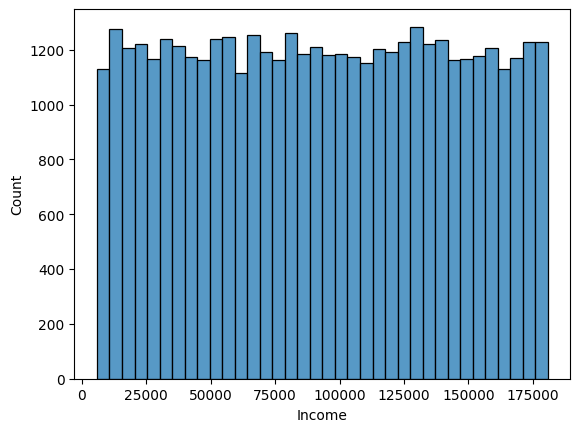

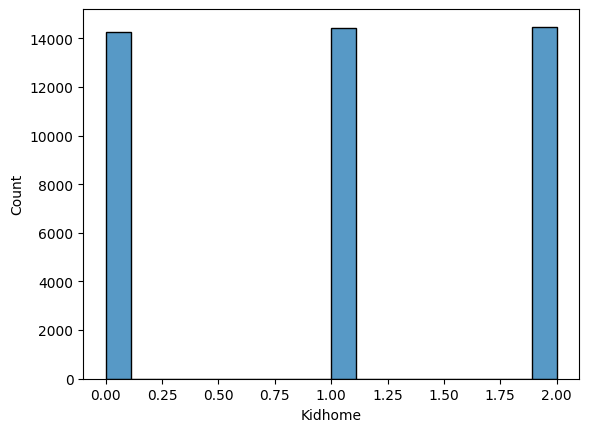

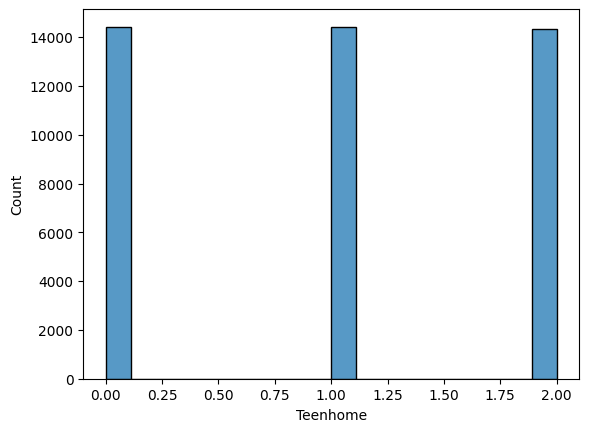

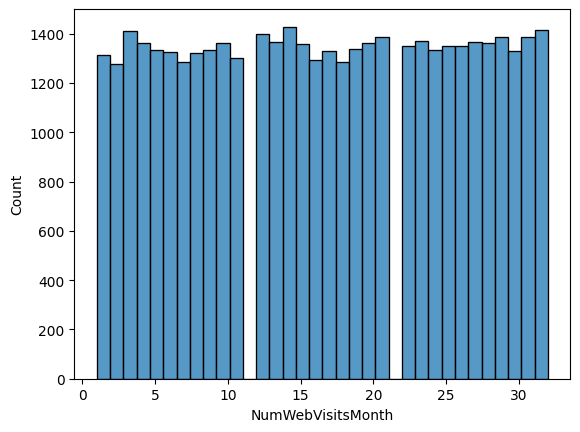

In [39]:
for col in columns_num_union:
 plt.figure()
 sns.histplot(df_union[col])
 plt.show()

## Boxplot

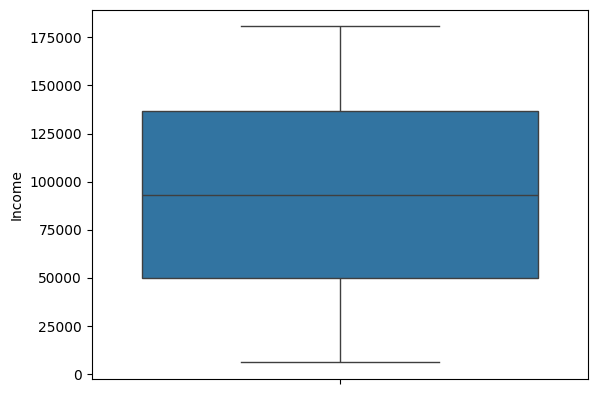

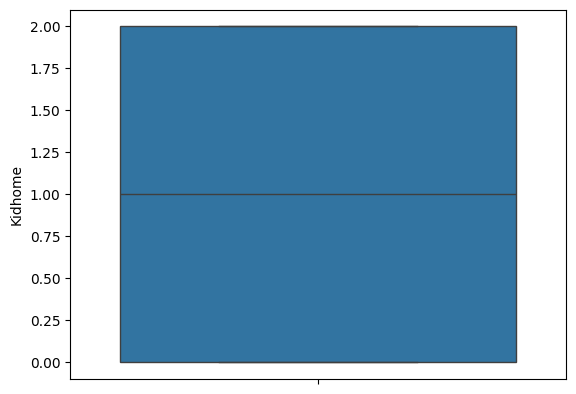

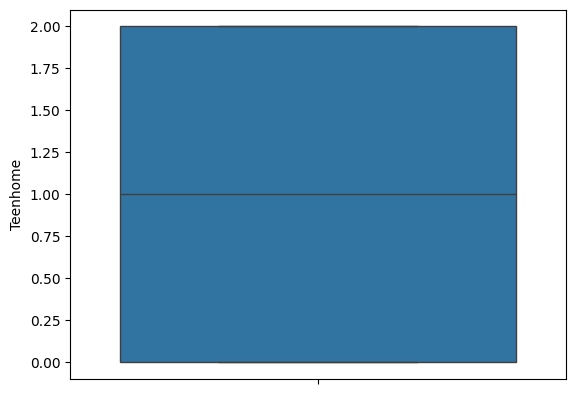

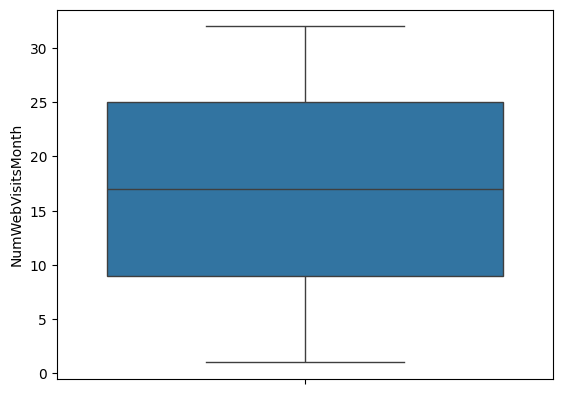

In [41]:
for col in columns_num_union:
 plt.figure()
 sns.boxplot(df_union[col])
 plt.show()

## Variables categoricas


In [42]:
df_union.describe( include=['category', 'object']).T

,count,unique,top,freq
ID,43170,43170,9727bc06-c11a-461a-a5bb-3d210467cc2a,1


In [43]:
columns_cate_union = df_union.select_dtypes(include= ['category', 'object']).columns

columns_cate_union

Index(['ID'], dtype='object')

In [44]:
for col in columns_cate_union:
    print(f'La columna {col} tiene un total de {df_union[col].nunique()} valores unicos')

    display(df_union[col].value_counts())

La columna ID tiene un total de 43170 valores unicos


ID
9727bc06-c11a-461a-a5bb-3d210467cc2a    1
089b39d8-e4d0-461b-87d4-814d71e0e079    1
5006b75e-18bb-46e9-ae1a-89f7eb79cc8a    1
e554d2ad-6c83-4603-93d4-fc596b807eff    1
3959015a-9713-4877-9a43-740e34c29eaf    1
                                       ..
5e3483e5-236d-437d-8351-541f9d09b9dd    1
d63ede72-0b6d-45b1-8872-385ac6897f65    1
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    1
9991fafb-4447-451a-8be2-b0df6098d13e    1
3f9f49b5-e410-4948-bf6e-f9244f04918b    1
Name: count, Length: 43170, dtype: int64

## Countplot

In [45]:
for col in columns_cate_union:
    if df_union[col].nunique() > 200:
        print(f'La columna {col} tiene demasiadas categorías: {df_union[col].nunique()}')
        continue
    print(f'Distribución de la columna {col}')
    plt.figure()
    sns.countplot(df_union[col])
    plt.show()

La columna ID tiene demasiadas categorías: 43170
